From original HDF5 files:

- 37 sessions (each session = 750 images)


From MindReader `nsd_utils.py`:
```raw
Extract voxels defined by roi_file.
    Served as a preprocessing to save time during sample loading.
    Write extracted vectors into hdf5 files under output_dir.

    - fmri_dir: where the fmri betas are located.
                Each beta file should have shape (750, 83, 104, 81).
    - roi_files: a list of files defining ROI. All have shape (81, 104, 83).
                 Voxels values out of interest are -1.
                 The else ranges from 0 to the (#region + 1).
    - regions: a dict. {str(roi_file_name): list(interested regions)}
               e.g. regions = {'prf-visualrois': [2, 3]}
               If provided, the funciton will only care about the voxels
               in the given regions. If None, will care about all voxels not -1.
    - flatten: if True, return a flattened vector for each fmri sample.
               (only voxels in the input roi_file are kept)
    - out_dir: where to write the new fmri to.
```

In [20]:
from glob import glob
import numpy as np
from PIL import Image

In [21]:
val_dir = '/home/jimgoo/data/neuro/val_subj01_0/'
sample = '00002'

In [22]:
glob(val_dir + f'/sample{sample}*')

['/home/jimgoo/data/neuro/val_subj01_0/sample00002.wholebrain_3d.npy',
 '/home/jimgoo/data/neuro/val_subj01_0/sample00002.wholebrain_flat.npy',
 '/home/jimgoo/data/neuro/val_subj01_0/sample00002.jpg',
 '/home/jimgoo/data/neuro/val_subj01_0/sample00002.sgxl_emb.npy',
 '/home/jimgoo/data/neuro/val_subj01_0/sample00002.nsdgeneral.npy',
 '/home/jimgoo/data/neuro/val_subj01_0/sample00002.trial.npy']

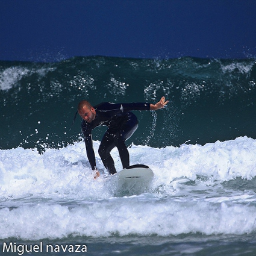

In [23]:
f = val_dir + f'sample{sample}.jpg'
Image.open(f)

In [24]:
voxels_2d = np.load(val_dir + f'sample{sample}.nsdgeneral.npy')
voxels_2d.shape

(15724,)

In [31]:
# so this is one image out of a 750 image session
voxels_3d = np.load(val_dir + f'sample{sample}.wholebrain_3d.npy')
voxels_3d.shape

(83, 104, 81)

In [26]:
np.prod(voxels_3d.shape)

699192

In [27]:
voxels_flat = np.load(val_dir + f'sample{sample}.wholebrain_flat.npy')
voxels_flat.shape

(699192,)

In [30]:
83*104, 83*81, 104*81

(8632, 6723, 8424)

In [32]:
trial = np.load(val_dir + f'sample{sample}.trial.npy')
trial.shape

(1,)

In [33]:
trial

array([2])

```raw
sample00002.wholebrain_3d.npy    (83, 104, 81)
sample00002.wholebrain_flat.npy  (699192,) which is 83 * 104 * 81
sample00002.nsdgeneral.npy       (15724,)
```